## Assignment 07 (60 pts) - Due December 4th, 11:59 PM

(5 pts) Be sure that your code is well-documented for reproducibility. Set a random seed at the top of your code for reproducibility (`np.random.seed(seed_number)`). Every function should have a docstring (simple functions can be short, longer functions should contain more detail). Before submitting, re-run your code. Figures should be labeled (axes labels, legends, etc), and clearly address any questions asked below! Remember, the whole goal is to have clear and concise communication of what you are finding computationally. 

Feel free to add cells as needed. You do not have to only use the cells that I provided.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

## Question 1
***
**Receptive field development with BCM rule**
Consider 20 presynaptic neurons with firing rates $r_j$ that connect onto the same postsynaptic neuron which fires at a rate $r^{post}=\sum_{j=1}^{20}w_jr_j$. Synaptic weights $w_j$ change according to the Bienenstock-Cooper-Munro (BCM) rule, with a hard lower bound $w_j\ge 0$ and $ r_\theta=10 $ Hz:

$$
    \frac{d}{dt}w_j = \eta r^{post}r_j(r^{post}-r_\theta)
$$

The 20 inputs are organized in two groups of 10 inputs each. There are two possible input patterns, $P^k$, $k=1,2$. Choose learning rate of $\eta=10^{-5}$. Initialize the weights as independently sampled from a uniform distribution between 0 and 1. Choose a time step size of $\Delta t = 1$.


**(5 pts)** **(a)** The two possible input patterns are: $P^1 $ -- group 1 fires at 3 Hz and group 2 is quiescent; and $P^2 $ --  group 1 is quiescent and group 2 fires at 0.5 Hz.  For each time step, randomly select input pattern from $P^1$ and $P^2$ with 50\% probability.   Set a upper bound of $w_j$ to be $w_{\rm max} =10$.  Simulate $N_t =1000$ time steps.  How do weights $w_{j}$  evolve? Plot a heatmap of the weights using `imshow` with x-axis being time and y-axis being the presynaptic neuron ID, $j$. Plot the  firing rates of the  post-synaptic neuron, $r^{\rm post} $, over time steps when the input patterns are $P^1$ or $P^2$, separately.   Show that the post-synaptic neuron becomes specialized to one group of inputs.

In [45]:
# define constants
dt = 1
T = 1000
eta = 1e-5
r_0 = 10
w_max = 10

# initialize weights
w_init = np.random.rand((20))

# create input patterns
pattern1 = np.concat((np.ones(10) * 3, np.zeros(10)))
pattern2 = np.concat((np.zeros(10), np.ones(10) * 0.5))

In [46]:
def simulate(T, pattern1, pattern2, w_init):
    """
    Simulate system evolution

    Parameters:
    -----------
    T : int
        Time steps
    
    pattern1 : np array
        pre-synaptic neuron pattern 1
    
    pattern1 : np array
        pre-synaptic neuron pattern 1
    
    w_init : np array
        initial weights
    
    Returns:
    -----------
    np array
        weights accross time
    np array
        post-synaptic neuron weights for pattern 1
    np array
        post-synaptic neuron weights for pattern 2
    """
    p1_rpost = []
    p2_rpost = []
    
    # create weights
    weights = np.vstack((w_init, np.zeros((T-1, 20))))

    for i in range(1,T):
        # select pattern
        rand = np.random.rand()
        pattern = pattern1 if rand > 0.5 else pattern2

        # calculate post-synaptic neuron's rate
        r_post = np.dot(weights[i-1], pattern)
        p1_rpost.append(r_post) if rand > 0.5 else p2_rpost.append(r_post)

        # forward euler update the weights
        weights[i] = np.clip(weights[i-1] + eta * r_post * pattern * (r_post - r_0), a_min=0, a_max=w_max)

    return weights, p1_rpost, p2_rpost

In [47]:
weights, p1_rpost, p2_rpost = simulate(T, pattern1, pattern2, w_init)

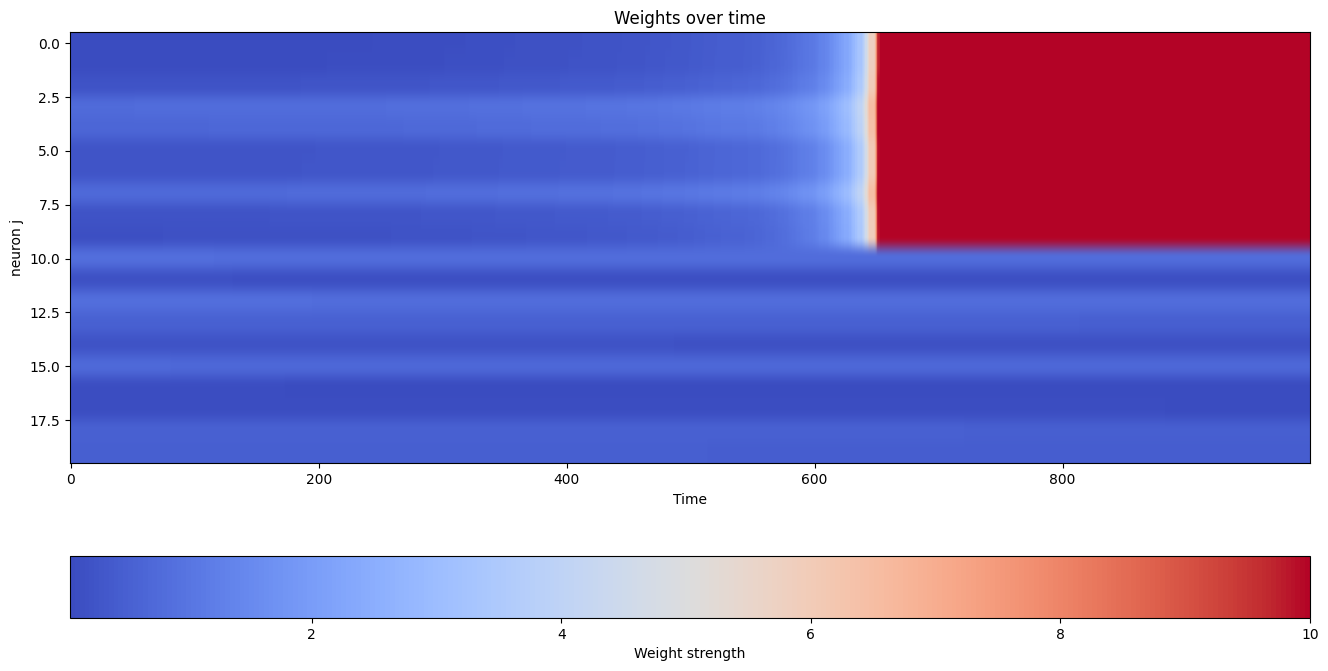

In [48]:
# visualize weight change over time
plt.figure(figsize=(16,8))
plt.imshow(np.transpose(weights), aspect='auto', cmap="coolwarm");
plt.xlabel("Time");
plt.ylabel("neuron j");
plt.title("Weights over time");
plt.colorbar(label='Weight strength', orientation='horizontal');
plt.show();

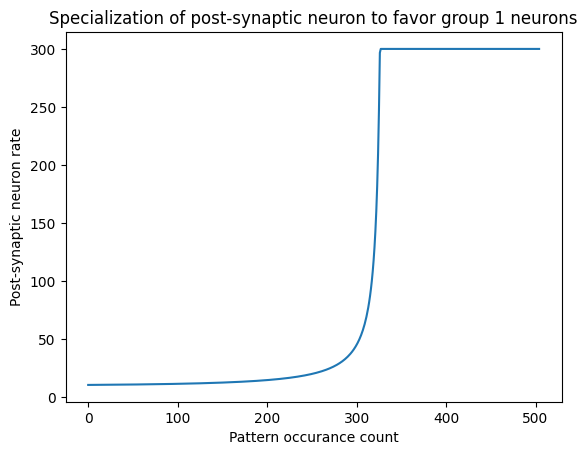

In [49]:
# firing rates of post-synaptic neuron by input pattern
plt.plot(p1_rpost)
plt.xlabel("Pattern occurance count");
plt.ylabel("Post-synaptic neuron rate");
plt.title("Specialization of post-synaptic neuron to favor group 1 neurons");

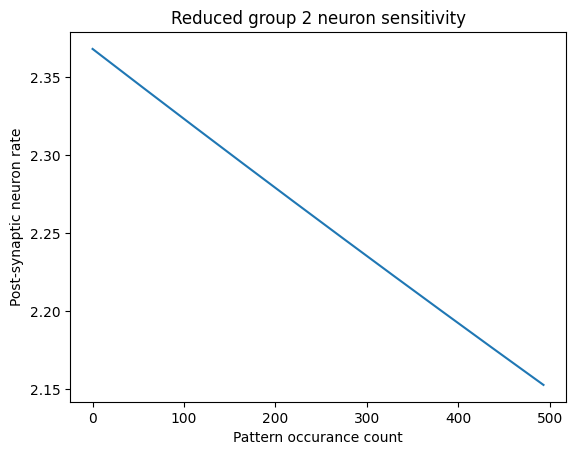

In [50]:
plt.plot(p2_rpost)
plt.xlabel("Pattern occurance count");
plt.ylabel("Post-synaptic neuron rate");
plt.title("Reduced group 2 neuron sensitivity");

**(5 pts)** **(b)** Similar to (a), except that the second pattern now is  $k =2 $ -- group 1 is quiescent and group 2 fires at 2 Hz. How do weights $w_{j}$  and  firing rate $r^{\rm post} $ evolve? 

In [60]:
# define constants
dt = 1
T = 1000
eta = 1e-5
r_0 = 10
w_max = 10

# initialize weights
w_init = np.random.rand((20))
weights = np.vstack((w_init, np.zeros((T-1, 20))))

# create input patterns
pattern1 = np.concat((np.ones(10) * 3, np.zeros(10)))
pattern2 = np.concat((np.zeros(10), np.ones(10) * 2))

In [61]:
weights, p1_rpost, p2_rpost = simulate(T, pattern1, pattern2, w_init)

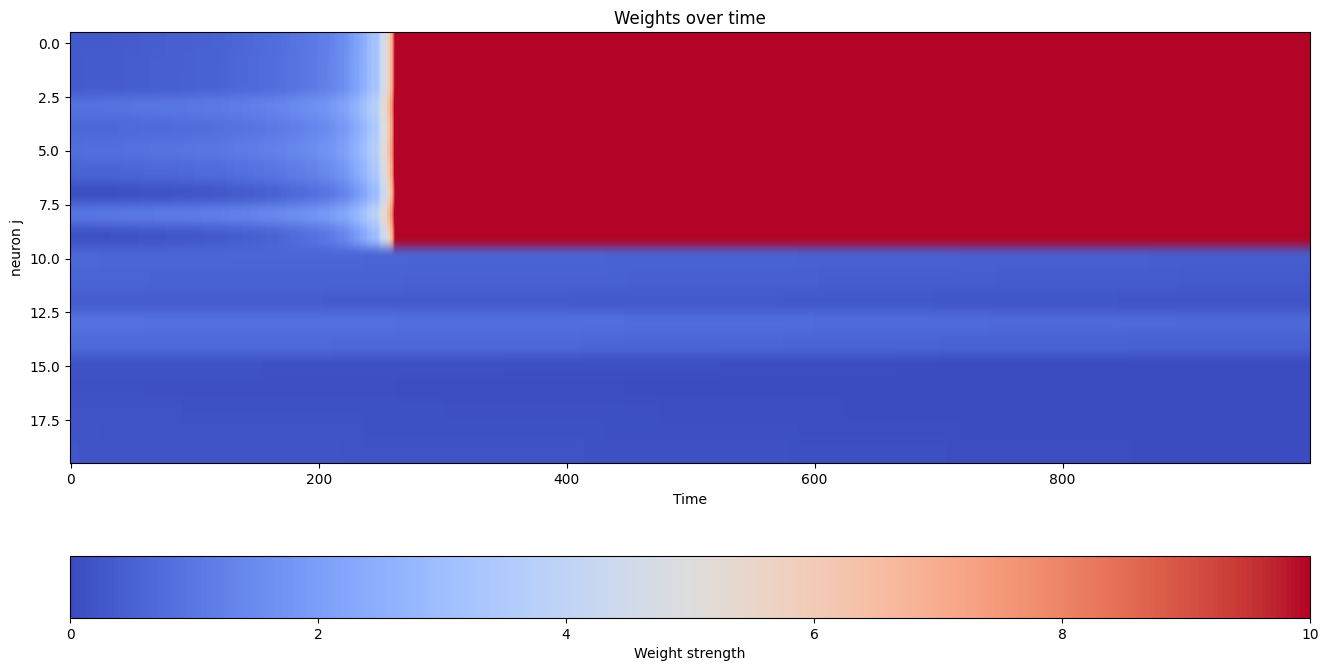

In [62]:
# visualize weight change over time
plt.figure(figsize=(16,8))
plt.imshow(np.transpose(weights), aspect='auto', cmap="coolwarm");
plt.xlabel("Time");
plt.ylabel("neuron j");
plt.title("Weights over time");
plt.colorbar(label='Weight strength', orientation='horizontal');
plt.show();

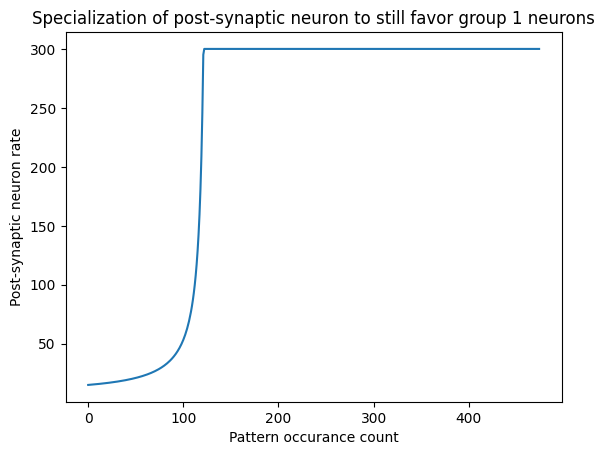

In [63]:
# firing rates of post-synaptic neuron by input pattern
plt.plot(p1_rpost)
plt.xlabel("Pattern occurance count");
plt.ylabel("Post-synaptic neuron rate");
plt.title("Specialization of post-synaptic neuron to still favor group 1 neurons");

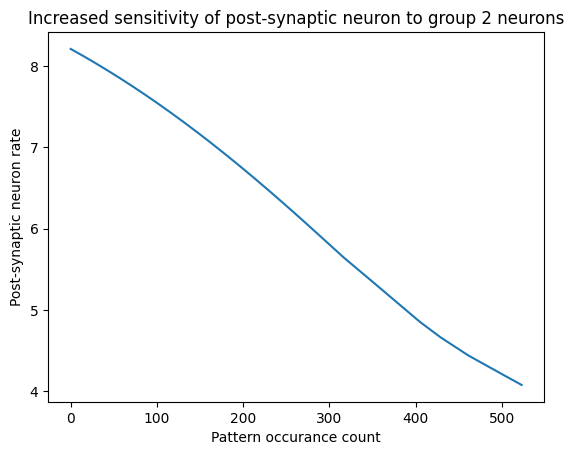

In [64]:
plt.plot(p2_rpost)
plt.xlabel("Pattern occurance count");
plt.ylabel("Post-synaptic neuron rate");
plt.title("Increased sensitivity of post-synaptic neuron to group 2 neurons");

**(5 pts)** **(c)** As in (b), the two possible input patterns are: $P^1 $ -- group 1 fires at 3 Hz and group 2 is quiescent; and $P^2 $ --  group 1 is quiescent and group 2 fires at 2 Hz.  but make $r_\theta$ a function of the time-average firing rate $r^{\rm post} $ of the post-synaptic neuron. 
\begin{equation}
\tau_{\theta} \frac{dr_\theta}{dt} =  (r^{\rm post})^2/10 -r_\theta.  
\end{equation}
with $\tau_{\theta}  =20 $.  Simulate $N_t =5000$ time steps. Plot a heatmap of the presynaptic weights over time. Plot the  firing rates of the  post-synaptic neuron, $r^{\rm post}$, over time steps when the input patterns are $P^1$ or $P^2$, separately, and plot the threshold, $r_{\theta}$ over time.     Repeat a few times with different initialization of weights. 

In [14]:
# define constants
dt = 1
T = 5000
eta = 1e-5
r_0 = 10
w_max = 10
tau_0 = 20

# initialize weights
w_init = np.random.rand((20))
weights = np.vstack((w_init, np.zeros((T-1, 20))))

# create input patterns
pattern1 = np.concat((np.ones(10) * 3, np.zeros(10)))
pattern2 = np.concat((np.zeros(10), np.ones(10) * 2))

In [15]:
def simulateWithR0(T, pattern1, pattern2, w_init, r0):
    """
    Simulate system evolution

    Parameters:
    -----------
    T : int
        Time steps
    
    pattern1 : np array
        pre-synaptic neuron pattern 1
    
    pattern1 : np array
        pre-synaptic neuron pattern 1
    
    w_init : np array
        initial weights
    
    Returns:
    -----------
    np array
        weights accross time
    np array
        post-synaptic neuron weights for pattern 1
    np array
        post-synaptic neuron weights for pattern 2
    """
    p1_rpost = []
    p2_rpost = []
    r0s = []
    r0s.append(r0)
    rposts = [0]

    # create weights
    weights = np.vstack((w_init, np.zeros((T-1, 20))))

    for i in range(1,T):
        # select pattern
        rand = np.random.rand()
        pattern = pattern1 if rand > 0.5 else pattern2

        # calculate post-synaptic neuron's rate
        r_post = weights[i-1] @ pattern
        rposts.append(r_post)

        # r_post = np.dot(weights[i-1], pattern)
        p1_rpost.append(r_post) if rand > 0.5 else p2_rpost.append(r_post)

        # forward euler update the weights
        weights[i] = np.clip(weights[i-1] + eta * r_post * pattern * (r_post - r0), a_min=0, a_max=w_max)

        # forward euler update the r0 threshold
        r0 = r0 + (rposts[-2]**2 / 10 - r0) / tau_0
        r0s.append(r0)

    return weights, p1_rpost, p2_rpost, r0s

In [16]:
weights, p1_rpost, p2_rpost, r0s = simulateWithR0(T, pattern1, pattern2, w_init, r_0)

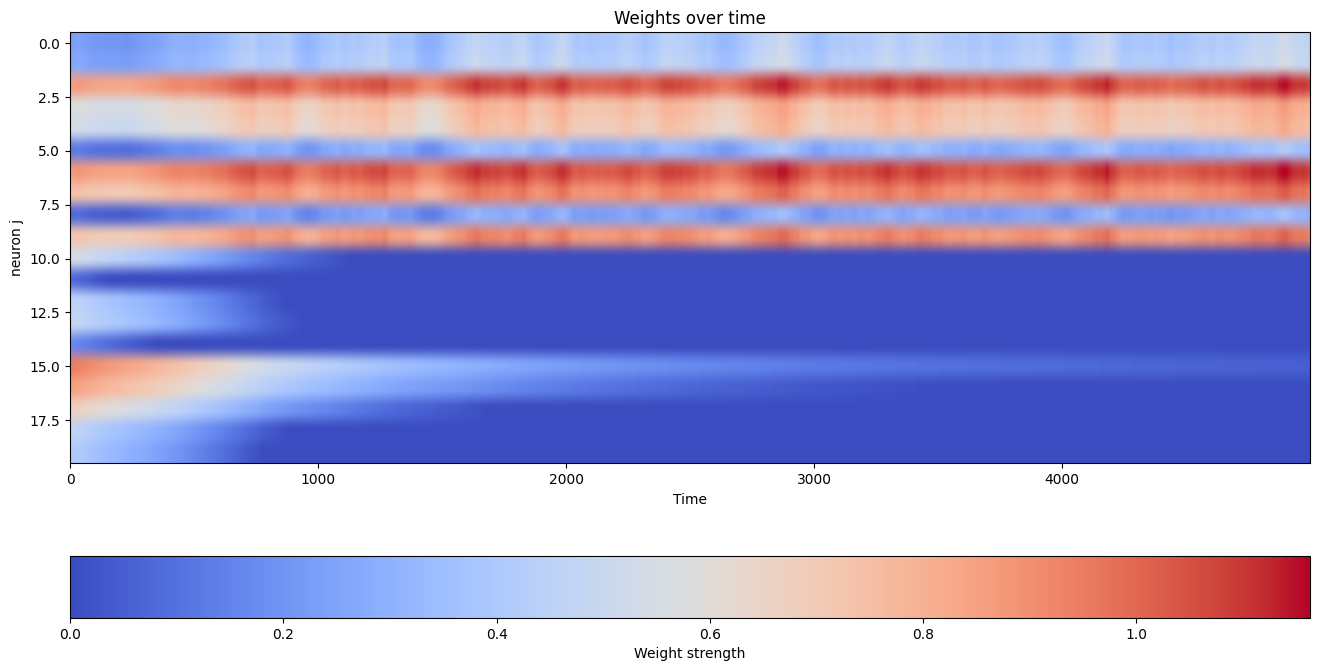

In [17]:
# visualize weight change over time
plt.figure(figsize=(16,8))
plt.imshow(np.transpose(weights), aspect='auto', cmap="coolwarm");
plt.xlabel("Time");
plt.ylabel("neuron j");
plt.title("Weights over time");
plt.colorbar(label='Weight strength', orientation='horizontal');
plt.show();

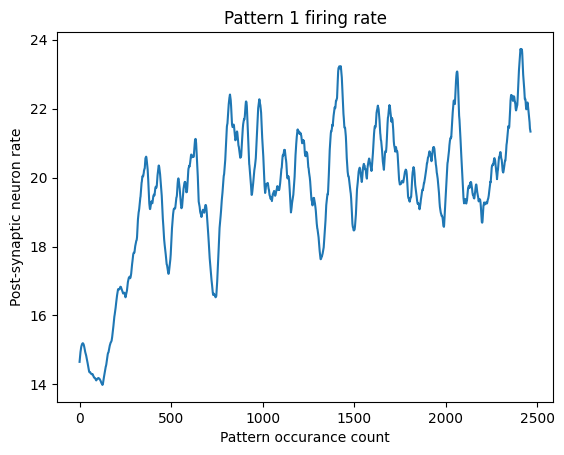

In [18]:
# firing rates of post-synaptic neuron by input pattern
plt.plot(p1_rpost)
plt.xlabel("Pattern occurance count");
plt.ylabel("Post-synaptic neuron rate");
plt.title("Pattern 1 firing rate");

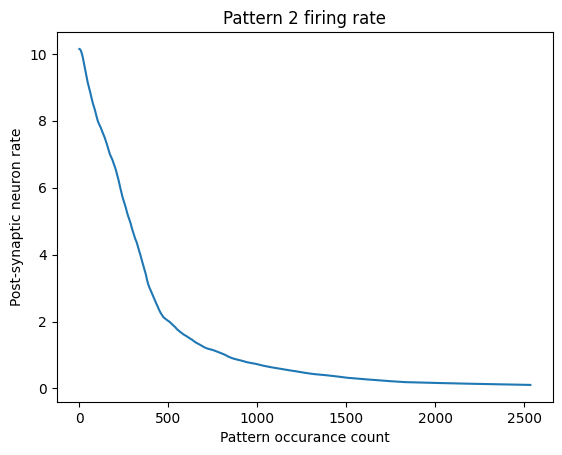

In [19]:
plt.plot(p2_rpost);
plt.xlabel("Pattern occurance count");
plt.ylabel("Post-synaptic neuron rate");
plt.title('Pattern 2 firing rate');

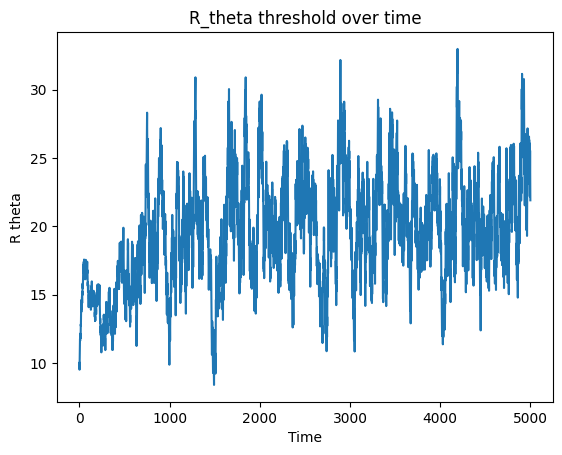

In [20]:
plt.plot(r0s)
plt.xlabel('Time')
plt.ylabel("R theta")
plt.title("R_theta threshold over time");

***

# Question 2
***
**Perceptron binary classifier.**   Train a perceptron for binary classification. Each sample of input is  a $D$-dimensional vector,  $\vec{x}=(x_1, x_2, \ldots,  x_D)^T$. Each element $x_i$ is independent and normally distributed with standard deviation 1 and different mean.   Consider two categories of inputs.  Category 1 ($y=+1$): the mean of $\vec{x}$ is $\vec{c}_1$;  Category 2 ($y=-1$): the mean of $\vec{x}$ is $\vec{c}_2$ which is not equal to $\vec{c}_1$. Generate $K_{\rm train} = 10000$ training samples and  $K_{\rm test} = 1000$ test samples  for each group.   

The prediction of the perceptron classifier is   $\hat{y} = {\rm sign}(\sum_{i=1}^D w_i x_i +b)$, where  $\vec{w} = (w_1, w_2, \ldots,  w_D)^T$  is the connection weight vector and $b$ is the bias.

Initialize $\vec{w}$ and $b$ to be zeros. Randomize the order of training samples.  For each training sample $\vec{x}^{(k)}$, compute the output activity  $\hat{y} = {\rm sign}(\vec{w} \cdot \vec{x}^{(k)}  +b)$. Then update  $\vec{w}$ and $b$  using the perceptron learning rule: 

$$
\vec{w} \rightarrow \vec{w}+ \eta (y^{(k)} - \hat{y}) \vec{x}^{(k)} \\
b \rightarrow b+\eta (y^{(k)} - \hat{y})
$$

where $\eta = 0.001$ is the learning rate.  Iterate through all training samples, $k=1, 2, \ldots, K_{\rm train}$. 

**(5 pts)** **(a)** First choose $D=2$. Let $\vec{c}_1=[2,2]^T$ and  $\vec{c}_2=[-2, -2]^T$.  Plot the test samples $\vec{x}$ from category 1 in blue and the test samples from category 2 in red on the $x_1-x_2$ plane. After training, plot the decision boundary of the trained  linear classifier,  which is the line of $w_1 x_1 +w_2 x_2 +b = 0$.  

In [21]:
### Initial Set up - Don't change this code ###
K = 10000
D = 2
center1 = 2 * np.ones((D, 1))
center2 = -2 * np.ones((D, 1))
x1 = np.random.randn(D, K) + center1
y1 = np.ones(K)
x2 = np.random.randn(D, K) + center2
y2 = -1 * np.ones(K)
X = np.concatenate([x1, x2], axis=1)
Y = np.concatenate([y1, y2])
permutes = np.random.permutation(2 * K)
X = X[:, permutes]
Y = Y[permutes]

Ktest = 1000
x1_test = np.random.randn(D, Ktest) + center1
y1_test = np.ones(Ktest)
x2_test = np.random.randn(D, Ktest) + center2
y2_test = -1 * np.ones(Ktest)
Xtest = np.concatenate([x1_test, x2_test], axis=1)
Ytest = np.concatenate([y1_test, y2_test])

In [22]:
# training
eta = 1e-3
w = np.zeros(D)
b = 0

for i in range(K):
    y_pred = 1 if np.dot(w, X[:,i]) + b > 0 else -1
    w = w + eta * (Y[i] - y_pred) * X[:,i]
    b = b + eta * (Y[i] - y_pred)

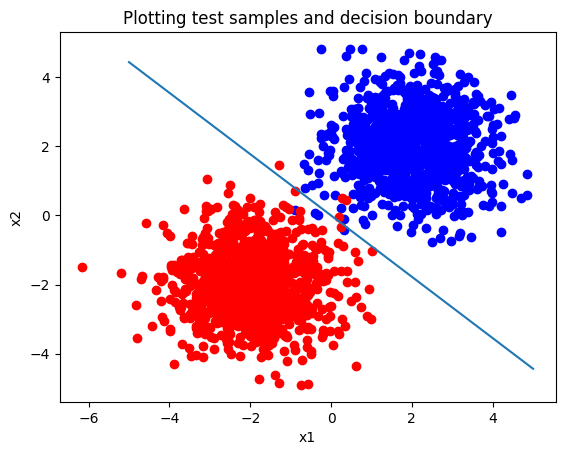

In [23]:
# plot test samples from category 1 in blue and test samples from category 2 in red
plt.scatter(x1_test[0,:], x1_test[1,:], c='blue');
plt.scatter(x2_test[0,:], x2_test[1,:], c='red');
plt.xlabel('x1');
plt.ylabel('x2');

# and plot the decision boundary
xs = np.linspace(-5,5,100)
ys = (-w[0] * xs - b) / w[1]
plt.plot(xs, ys)
plt.title("Plotting test samples and decision boundary");

**(5 pts)** **(b)** Compute the accuracy of the classifier on test samples, which is the percentage of samples where  the prediction $\hat{y}^{(k)}  = {\rm sign}(\vec{w} \cdot \vec{x}^{(k)} +b)$ equals the data category $y^{(k)}$.  

In [24]:
# find the accuracy on test samples
def accuracy(w, b, Xtest, Ytest):
    """
    Determine accuracy given a trained linear model

    Parameters:
    -----------
    w: np array
        weights
    b: float
        bias
    Xtest: np array
        Test features
    Ytest: np array
        Test labels
    
    Returns:
    ---------
    float
        accuracy from 0 to 1
    """
    # line_val = (-w[0] * Xtest[0,:] + b) / w[1]
    # pred = 2 * (Xtest[1,:] >= line_val).astype(int) - 1
    pred = np.sign(np.matmul(w,Xtest) + b)
    accuracy = (Ytest == pred).sum() / Ytest.size
    return accuracy

print(f"Accuracy on test set: {accuracy(w,b,Xtest,Ytest)}")

Accuracy on test set: 0.996


**(5 pts)** **(c)** Compare the final result of  $\vec{w}$ and the vector connecting the centers of inputs from the two categories,  $\vec{m} = \vec{c}_1 - \vec{c}_2$.  Compute the overlap between $\vec{w}$ and $\vec{m}$ as $p = \frac{\sum_{i=1}^D w_i m_i }{\sqrt{(\sum_{i=1}^D w_i^2)(\sum_{i=1}^D m_i^2)}}$.  

In [25]:
# compare w with m
group1mean = np.mean(x1, axis=1)
group2mean = np.mean(x2, axis=1)
m = group1mean - group2mean

print(f"w vector: {w}")
print(f"vector connecting centers from the two categories: {m}")
print("These vectors are both pointing in the same direction - positive x and positive y with a slope of about 1")

w vector: [0.00630343 0.00709768]
vector connecting centers from the two categories: [3.99194524 4.00374527]
These vectors are both pointing in the same direction - positive x and positive y with a slope of about 1


In [26]:
def overlap(w,m):
    """
    Find the overlap between two vectors

    Parameters:
    -----------
    w: np array
        first vec
    m: np array
        2nd vec
    
    Returns:
    --------
    result according to formula
    """
    return np.dot(w,m) / np.sqrt(np.dot(w,w) * np.dot(m,m))
print(f"overlap: {overlap(w,m)}")

overlap: 0.9983345338143693



**(5 pts)** **(d)** Vary $D$ from 1 to 20 and let $\vec{c}_1=[0.5,0.5, \ldots, 0.5]^T$ and  $\vec{c}_2=[-0.5, -0.5,  \ldots, -0.5]^T$.  For each $D$, do 10 repetitions of the training process. Make a scatter plot of accuracy  and a scatter plot of the overlap between $\vec{w}$ and $\vec{m}$ across $D$ for all repetitions.  Show that the accuracy and overlap between $\vec{w}$ and $\vec{m}$ increase with the dimension of inputs.

In [27]:
accuracies = []
overlaps = []

for D in range(1,21):
    accuracies.append([])
    overlaps.append([])

    for i in range(10):
        K = 10000

        center1 = 0.5 * np.ones((D, 1))
        center2 = -0.5 * np.ones((D, 1))
        x1 = np.random.randn(D, K) + center1
        y1 = np.ones(K)
        x2 = np.random.randn(D, K) + center2
        y2 = -1 * np.ones(K)
        X = np.concatenate([x1, x2], axis=1)
        Y = np.concatenate([y1, y2])
        permutes = np.random.permutation(2 * K)
        X = X[:, permutes]
        Y = Y[permutes]

        Ktest = 1000
        x1_test = np.random.randn(D, Ktest) + center1
        y1_test = np.ones(Ktest)
        x2_test = np.random.randn(D, Ktest) + center2
        y2_test = -1 * np.ones(Ktest)
        Xtest = np.concatenate([x1_test, x2_test], axis=1)
        Ytest = np.concatenate([y1_test, y2_test])

        # train model
        eta = 1e-3
        w = np.zeros(D)
        b = 0

        for i in range(K):
            y_pred = 1 if np.dot(w, X[:,i]) + b > 0 else -1
            w = w + eta * (Y[i] - y_pred) * X[:,i]
            b = b + eta * (Y[i] - y_pred)

        # find accuracy and overlap
        acc = accuracy(w,b,Xtest,Ytest)
        accuracies[-1].append(acc)

        group1mean = np.mean(x1, axis=1)
        group2mean = np.mean(x2, axis=1)
        m = group1mean - group2mean
        overlaps[-1].append(overlap(w,m))

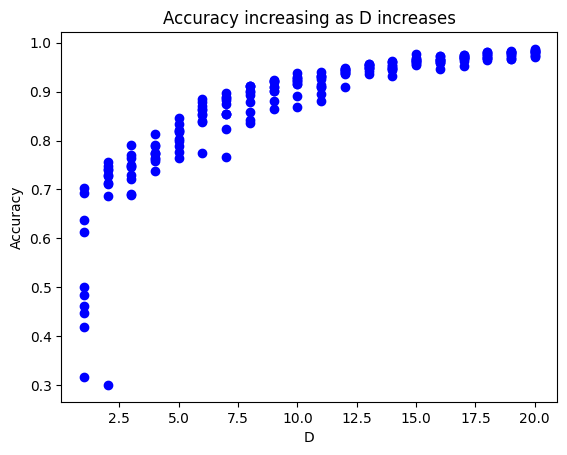

In [28]:
# plot accuracy and overlap
for d in range(len(accuracies)):
    for i in range(10):
        plt.scatter(d+1,accuracies[d][i],c='blue')
plt.xlabel("D");
plt.ylabel("Accuracy");
plt.title("Accuracy increasing as D increases");

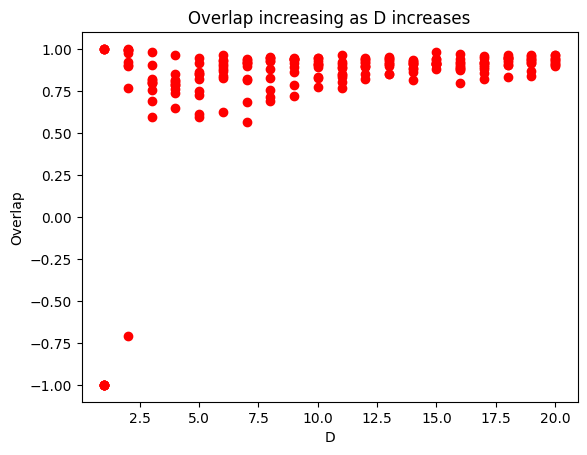

In [29]:
# plot overlap
for d in range(len(overlaps)):
    for i in range(10):
        plt.scatter(d+1,overlaps[d][i],c='red')

plt.xlabel("D");
plt.ylabel("Overlap");
plt.title("Overlap increasing as D increases");

***

# Question 3
***
**PCA on MNIST dataset.** The MNIST dataset is a large database of handwritten digits that is often used to benchmark machine learning algorithms. Each image is a 28x28 pixel grayscale imiage. For convenience, each 28x28 pixel image is unravelled into a single 784 (28^2) element vector. In the data file on Glow, `mnist.zip`, there is a training data set, trainX of 60,000 images and a testing data set testX of 10,000 images. Each row represents a different image, and each column represents a different pixel. 

You can visualize an image $k$ in the training set with `ax.imshow(trainX[k,:].reshape(28,28))`, an example is below. Each image has an associated label denoting which digit the image represents (0-9). The labels for the training images are saved in trainY, and the labes for the test images are saved in testY.

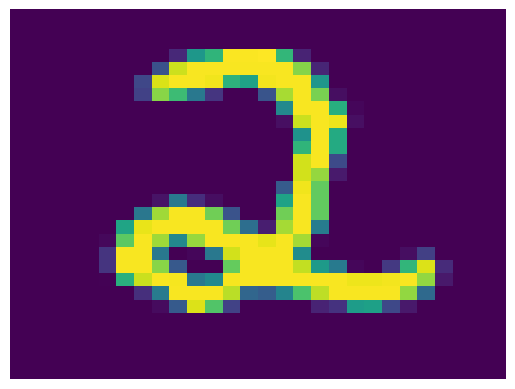

In [30]:
### read in MNIST data ###
### Don't chage this code ###
### Assumes MNIST data in same directory as notebook ###
trainX = np.loadtxt("trainX.txt")
testX = np.loadtxt("testX.txt")
trainY = np.loadtxt("trainY.txt")
testY = np.loadtxt("testY.txt")
X = np.concatenate([trainX, testX])
n_samples, n_features = X.shape

# Example of plotting one image
plt.figure()
plt.imshow(X[378, :].reshape(28, 28), aspect="auto")
plt.axis("off")
plt.show()

**(5 pts)** **(a)**  Compute the mean of each column of $X$, $Xmean = mean(X)$ and subtract the mean from each column. Compute the covariance of $X$ using `np.cov` with the optional argument `rowvar=False` and eigenvalues of $\lambda_i$ of the covariance matrix. Determine the eigenvalues and eigenvectors with `np.linalg.eigh`. Plot all the eigenvalues sorted large to small (don't forget to rearrange the eigenvectors for later).

In [31]:
# center X
Xcolmeans = np.mean(X, axis=0)
centeredX = X - Xcolmeans

# find covariance matrix
# and its eigenvalues and eigenvectors
covariance = np.cov(centeredX, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

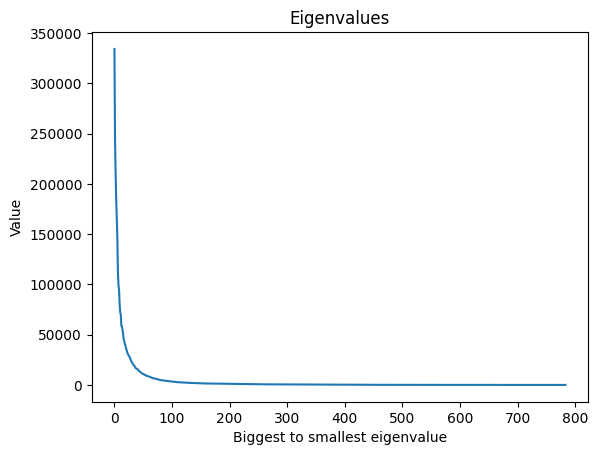

In [32]:
# plt eigenvalues biggest first
sortedeigenvals = np.flip(eigenvalues)
sortedeigenvecs = np.flip(eigenvectors)
plt.plot(sortedeigenvals);
plt.xlabel('Biggest to smallest eigenvalue');
plt.ylabel('Value');
plt.title('Eigenvalues');

**(5 pts)** **(b)** The intrinsic dimensionality of the dataset can be studied via the fraction of variance explained by the top $d$ eigenvalues:

$$
\text{VarExplained}(d) = \frac{\sum_{i=1}^d \lambda_i}{\sum_{i=1}^N\lambda_i} \quad N = 784
$$

The intrinsic dimensionality is often quantified by the $d$ necessary to explain a large proportion of the total variance of the data (often a defined threshold, e.g. 90%). Plot VarExplained $(d)$ for $d=1$ to $d=784$. What is the minimum $d$ such that the threshold of 90% is reached?

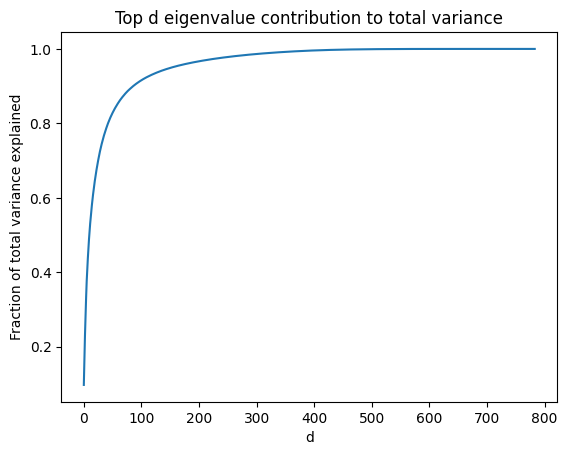

In [33]:
def varExplained(d):
    """
    Calculate the variance explained by the top d eigenvalues

    Parameters:
    -----------
    d: int
        number of biggest eigenvalues to use
    
    Returns:
    --------
    float
        fraction of variance explained
    """
    return sortedeigenvals[0:d].sum() / sortedeigenvals.sum()

variance_explained = []

for i in range(1,785):
    variance_explained.append(varExplained(i))

plt.plot(variance_explained);
plt.xlabel('d');
plt.ylabel('Fraction of total variance explained');
plt.title('Top d eigenvalue contribution to total variance');

In [34]:
variance_explained = np.asarray(variance_explained)
crossing90index = np.where(variance_explained > 0.9)[0][0].item()
print(f"Minimum d such that 90% of variance is explained by the top d eigenvalues: {crossing90index + 1}")

Minimum d such that 90% of variance is explained by the top d eigenvalues: 87


**(5 pts)** **(c)** Let's reconstruct the data using only a subset of the principal components. Try with $D = 20$, $D= 80$, and $D = 200$. 

For each $D$, reconstruct $X$ with only $D$ dimensions. In other words, project onto the top $D$ principal compoents, $Y_D = X_0 V_D$ where $X_0$ is $X-mean(X)$ (from part (a)) and $V_D$ is the matrix of eigenvectors with $D$ dimensions. Then, find the reconstrcuted $X_{recon}$ by $X_{recon} = Y_D V_D^T$. Don't forget to add back the mean(X)!

Choose 5 example images and plot both the original and reconstrcuted images for all values of $D$. This will result in a 20 panel figure.

In [35]:
# reconstructing data with a subset of principal components
Ds = [20, 80, 200]
ims = []
for D in Ds:
    yd = centeredX @ sortedeigenvecs[:,0:D]
    recon = (yd @ sortedeigenvecs[:,0:D].transpose()) + Xcolmeans
    ims.append(recon)

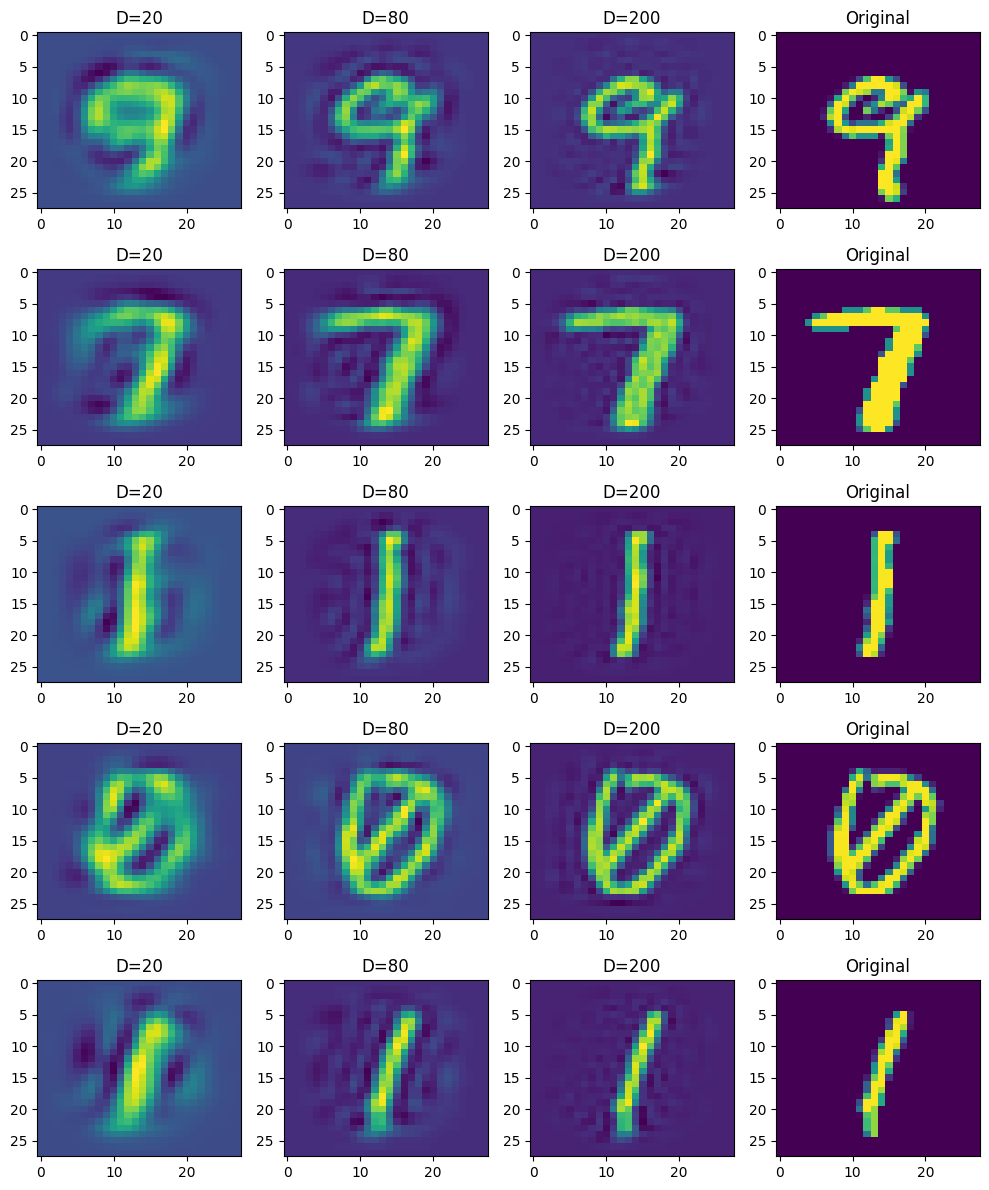

In [36]:
# plot 5 images with the original and their reconstructions at different D levels
fig, ax = plt.subplots(5,4, figsize=(10,12))
indicies = np.random.randint(0,70000,5)

for i in range(5):
    for j in range(4):
        current_axis = ax[i,j]
        if j == 3:
            current_axis.imshow(X[indicies[i],:].reshape(28,28), aspect='auto')
            current_axis.set_title("Original")
        else:
            current_axis.imshow(ims[j][indicies[i],:].reshape(28,28), aspect='auto')
            current_axis.set_title(f"D={Ds[j]}")
fig.tight_layout()
plt.show()

**(5 pts)** **(d)** Add Gaussian distributed independent noise to each pixel of the images $X$. Set the standard deviaion of the noise to be $0.2*max(X)$ and the mean of the noise to be 0. Repeat (a)-(c) from above with the noisy data. For part (a), you can skip the plot.

In [37]:
# create noisy dataset
std_dev = np.max(X) * 0.2
noise = np.random.normal(loc=0, scale=std_dev, size=(X.shape))
noisyData = noise + X

# set the noisy data to be named as X so I can use the same code as in previous parts
X = noisyData

In [38]:
# center X
Xcolmeans = np.mean(X, axis=0)
centeredX = X - Xcolmeans

# find covariance matrix
# and its eigenvalues and eigenvectors
covariance = np.cov(centeredX, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

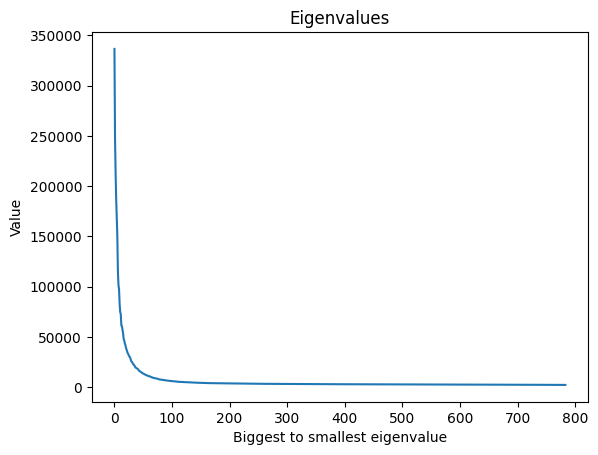

In [39]:
# plt eigenvalues biggest first
sortedeigenvals = np.flip(eigenvalues)
sortedeigenvecs = np.flip(eigenvectors)
plt.plot(sortedeigenvals);
plt.xlabel('Biggest to smallest eigenvalue');
plt.ylabel('Value');
plt.title('Eigenvalues');

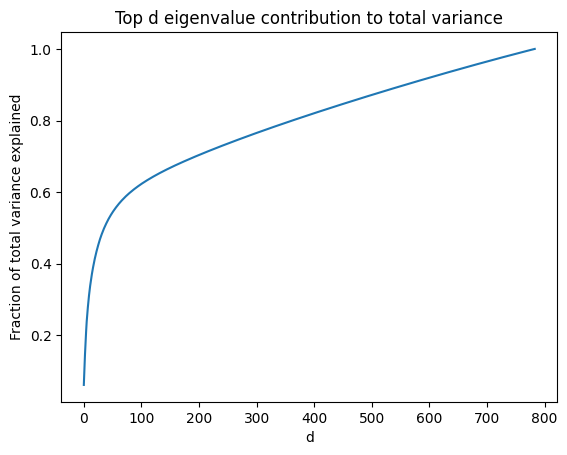

In [40]:
def varExplained(d):
    """
    Calculate the variance explained by the top d eigenvalues

    Parameters:
    -----------
    d: int
        number of biggest eigenvalues to use
    
    Returns:
    --------
    float
        fraction of variance explained
    """
    return sortedeigenvals[0:d].sum() / sortedeigenvals.sum()

variance_explained = []

for i in range(1,785):
    variance_explained.append(varExplained(i))

plt.plot(variance_explained);
plt.xlabel('d');
plt.ylabel('Fraction of total variance explained');
plt.title('Top d eigenvalue contribution to total variance');

In [41]:
variance_explained = np.asarray(variance_explained)
crossing90index = np.where(variance_explained > 0.9)[0][0].item()
print(f"Minimum d such that 90% of variance is explained by the top d eigenvalues: {crossing90index + 1}")

Minimum d such that 90% of variance is explained by the top d eigenvalues: 560


In [42]:
# reconstructing data with a subset of principal components
Ds = [20, 80, 200]
ims = []
for D in Ds:
    yd = centeredX @ sortedeigenvecs[:,0:D]
    recon = (yd @ sortedeigenvecs[:,0:D].transpose()) + Xcolmeans
    ims.append(recon)

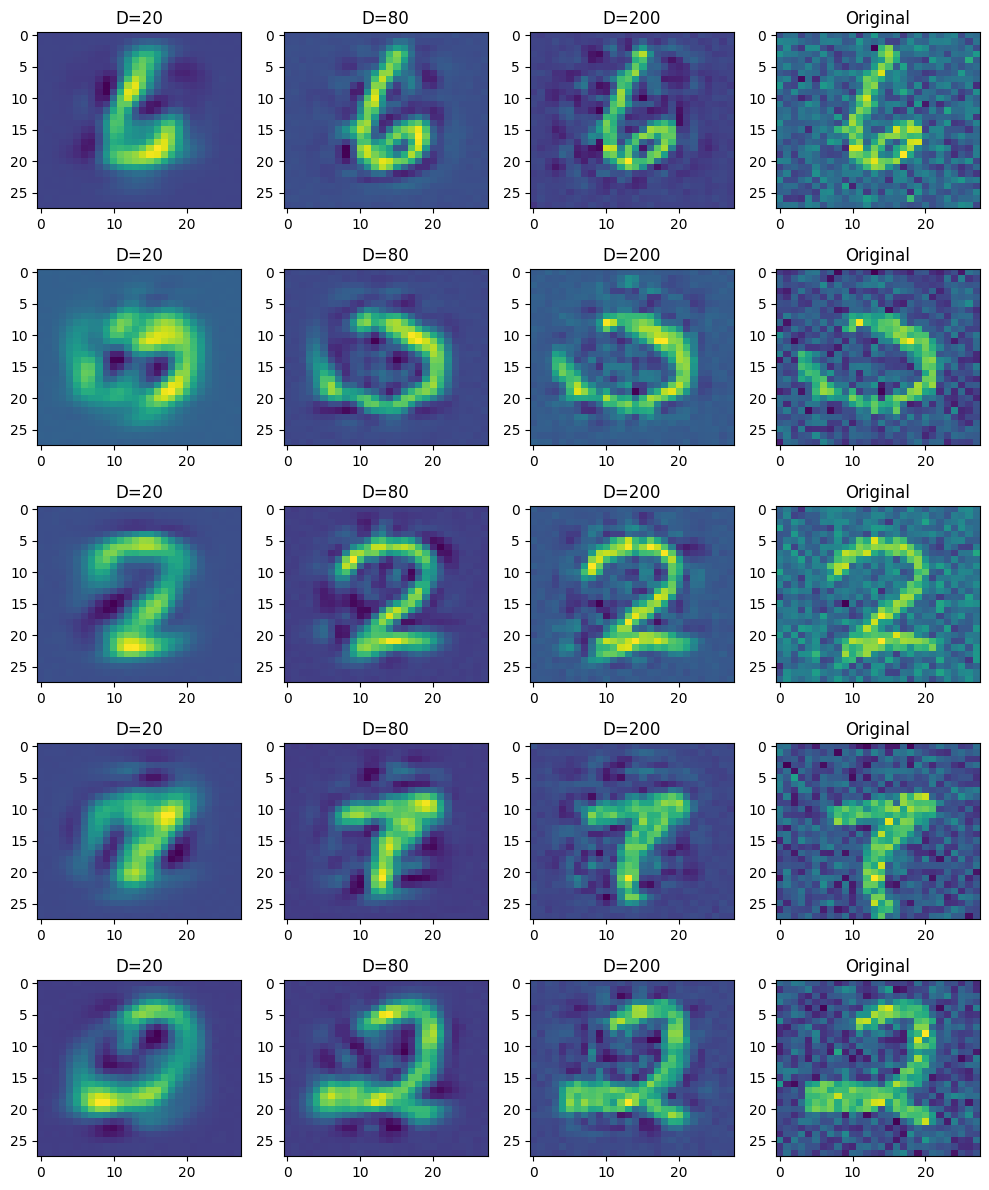

In [43]:
# plot 5 images with the original and their reconstructions at different D levels
fig, ax = plt.subplots(5,4, figsize=(10,12))
indicies = np.random.randint(0,70000,5)

for i in range(5):
    for j in range(4):
        current_axis = ax[i,j]
        if j == 3:
            current_axis.imshow(X[indicies[i],:].reshape(28,28), aspect='auto')
            current_axis.set_title("Original")
        else:
            current_axis.imshow(ims[j][indicies[i],:].reshape(28,28), aspect='auto')
            current_axis.set_title(f"D={Ds[j]}")
fig.tight_layout()
plt.show()

Thanks Prof Parker! :)